# 07.08 Preprocess 37-00049 (Dallas, TX)

In [21]:
import pandas

from cpe_help import Department

In [4]:
dept = Department('37-00049')
path = dept.tabular_input_dir / '37-00049_UOF-P_2016_prepped.csv'
df = pandas.read_csv(path, low_memory=False, skiprows=[1])

df.head().T

,0,1,2,3,4
INCIDENT_DATE,9/3/16,3/22/16,5/22/16,1/10/16,11/8/16
INCIDENT_TIME,4:14:00 AM,11:00:00 PM,1:29:00 PM,8:55:00 PM,2:30:00 AM
UOF_NUMBER,37702,33413,34567,31460,"37879, 37898"
OFFICER_ID,10810,7706,11014,6692,9844
OFFICER_GENDER,Male,Male,Male,Male,Male
OFFICER_RACE,Black,White,Black,Black,White
OFFICER_HIRE_DATE,5/7/14,1/8/99,5/20/15,7/29/91,10/4/09
OFFICER_YEARS_ON_FORCE,2,17,1,24,7
OFFICER_INJURY,No,Yes,No,No,No
OFFICER_INJURY_TYPE,No injuries noted or visible,Sprain/Strain,No injuries noted or visible,No injuries noted or visible,No injuries noted or visible


In [15]:
df.shape

(2383, 47)

# Date

In [8]:
df[[c for c in df.columns if c.startswith('INCIDENT')]].head()

,INCIDENT_DATE,INCIDENT_TIME,INCIDENT_REASON
0,9/3/16,4:14:00 AM,Arrest
1,3/22/16,11:00:00 PM,Arrest
2,5/22/16,1:29:00 PM,Arrest
3,1/10/16,8:55:00 PM,Arrest
4,11/8/16,2:30:00 AM,Arrest


In [24]:
date = df['INCIDENT_DATE']
time = df['INCIDENT_TIME']
time_known = time.notnull()  # 99.6% of the cases

def get_datetime(date, time, time_known):
    if time_known:
        return pandas.to_datetime(
            date + ' ' + time,
            format='%m/%d/%y %I:%M:%S %p',
        )
    else:
        return pandas.to_datetime(date, format='%m/%d/%y')
        
datetimef = [get_datetime(d, t, k) for d, t, k in zip(date, time, time_known)]
datetimef = pandas.Series(datetimef, index=df.index)

In [25]:
datetimef.describe()

count                    2383
unique                   1499
top       2016-06-10 16:32:00
freq                       10
first     2016-01-01 00:11:00
last      2016-12-31 23:19:00
dtype: object

In [26]:
datetimef[~time_known]

358    2016-08-14
865    2016-11-17
1167   2016-05-19
1340   2016-03-27
1563   2016-05-19
1576   2016-05-16
1779   2016-03-27
1899   2016-03-27
1974   2016-03-27
2368   2016-02-13
dtype: datetime64[ns]

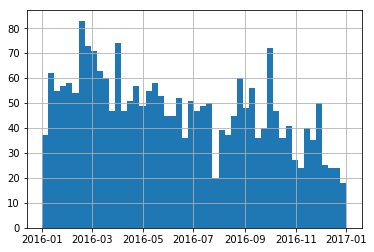

In [30]:
datetimef.hist(bins=50)

# Location

In [33]:
location = df[[c for c in df if c.startswith('LOCATION')]]
location.head()

,LOCATION_DISTRICT,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE
0,D14,211 N ERVAY ST,Dallas,TX,32.782205,-96.797461
1,D9,7647 FERGUSON RD,Dallas,TX,32.798978,-96.717493
2,D6,716 BIMEBELLA LN,Dallas,TX,32.739710,-96.925190
3,D11,5600 L B J FWY,Dallas,TX,NaN,NaN
4,D7,4600 S MALCOLM X BLVD,Dallas,TX,NaN,NaN


In [37]:
location.head(50)

,LOCATION_DISTRICT,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE
0,D14,211 N ERVAY ST,Dallas,TX,32.782205,-96.797461
1,D9,7647 FERGUSON RD,Dallas,TX,32.798978,-96.717493
2,D6,716 BIMEBELLA LN,Dallas,TX,32.739710,-96.925190
3,D11,5600 L B J FWY,Dallas,TX,NaN,NaN
4,D7,4600 S MALCOLM X BLVD,Dallas,TX,NaN,NaN
5,D9,1234 PEAVY RD,Dallas,TX,32.837527,-96.695566
6,D14,511 N AKARD ST,Dallas,TX,32.784328,-96.800631
7,D6,4709 LUCKY LN,Dallas,TX,32.803725,-96.874258
8,D14,300 S LAMAR ST,Dallas,TX,32.778107,-96.803839
9,D12,18600 DALLAS NORTH TOLLWAY,Dallas,TX,NaN,NaN


In [34]:
location.isnull().mean()

LOCATION_DISTRICT                               0.00000
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION    0.00000
LOCATION_CITY                                   0.00000
LOCATION_STATE                                  0.00000
LOCATION_LATITUDE                               0.02308
LOCATION_LONGITUDE                              0.02308
dtype: float64

Most NaN entries are in the beginning... This may be a problem and indicate an ordering (which doesn't look linked to time).

Let's keep it simple, later on we can geocode... There are few entries without Latitude and Longitude:

In [42]:
df[df['LOCATION_LATITUDE'].isnull()].shape

(55, 47)

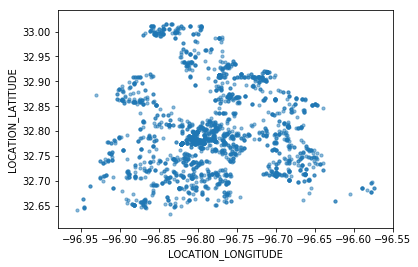

In [44]:
df.plot('LOCATION_LONGITUDE', 'LOCATION_LATITUDE', kind='scatter', s=10, alpha=0.5)

All good

In [45]:
dept.load_external_shapefile().crs

{'proj': 'lcc',
 'lat_1': 32.13333333333333,
 'lat_2': 33.96666666666667,
 'lat_0': 31.66666666666667,
 'lon_0': -98.5,
 'x_0': 600000,
 'y_0': 2000000,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

Except that they could have used the NAD83 datum in the coordinates... I will leave it and then revisit this section when I know more.

Intuition tells me that WGS84 or NAD83 won't make that much of a difference, and we can use them close to interchangeably.